In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import GPy

In [2]:
def rmse(y, y_):
    return np.sqrt(np.sum((y - y_) ** 2))

In [3]:
def f(x):
    return np.sin(x) + 0.7 * np.cos(2 * x) + 0.5 * np.sin(3 * x)

In [4]:
x = np.linspace(0, 2 * np.pi, 20).reshape(-1, 1)
y = np.sin(x) + 0.7 * np.cos(2 * x) + 0.5 * np.sin(3 * x) + 0.2 * np.random.rand(x.shape[0]).reshape(-1, 1)

In [5]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=0.2)
m = GPy.models.GPRegression(x,y,kernel)
m.likelihood.variance.fix(1e-5)
# m.optimize()

array([0])

In [6]:
np.random.seed(1)

RMSE Test of draw: 7.148645418241292
RMSE of posterior mean2.654663818477997


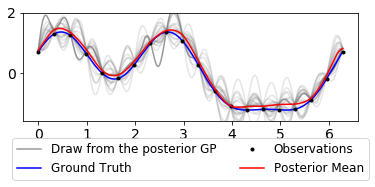

In [26]:
x_ = np.linspace(0, 2*np.pi, 500).reshape(-1, 1)
y_ = m.posterior_samples(x_, size=20)
y_true = f(x_)
y = f(x)
plt.figure(figsize=(6, 2))
plt.rcParams.update({'font.size': 14})
for i in range(y_.shape[2]):
    if i == 0:
        plt.plot(x_, y_[:, :, i], c='gray', alpha=0.8, label='Draw from the posterior GP')
        print('RMSE Test of draw: ' + str(rmse(y_true, y_[:, :, i])))

    else:
        plt.plot(x_, y_[:, :, i], c='gray', alpha=0.2)
y_star = m.predict(x_)
plt.plot(x_, y_true, c='b', label='Ground Truth')
plt.plot(x, y, ".", c='k', label='Observations')
plt.plot(x_, y_star[0], c='red', label='Posterior Mean')
print('RMSE of posterior mean' + str(rmse(y_true, y_star[0])))
# plt.plot(x_, np.mean(y_, axis=2), c='blue', label='Average draws')
# print('RMSE of mean of draws' + str(rmse(y_true, np.mean(y_, axis=2))))
plt.ylim([-1.6, 2])

plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', prop={'size': 12}, ncol=2)

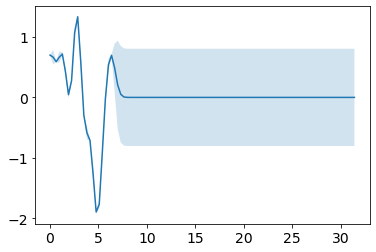

In [61]:
plt.plot(x_, y_star[0])
plt.fill_between(x_.reshape(-1), (y_star[0] - y_star[1]).flatten(), (y_star[0] + y_star[1]).flatten(), alpha=0.2)
